# ML 01 - Linear Regression
Enrico Borriello, Sept 2018 - enrico.borriello@asu.edu

In this first tutorial we will use the following dataset:

## Atmospheric CO<sub>2</sub> levels
Mauna Loa Observatory, Hawaii 1958 - 2018

Download the data file **``co2_mm_mlo.txt``** from <br />
https://climate.nasa.gov/vital-signs/carbon-dioxide/

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline 

import linear_regression as lr

In [16]:
df = pd.read_table('co2_mm_mlo.txt', skiprows=72, delim_whitespace=True,header=None)

In [17]:
# visualize the initial rows
df[:5]

,0,1,2,3,4,5,6
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


In [39]:
x = np.array(df[[2]])
Y = np.array(df[[4]])
m = len(x)
print(m)

726


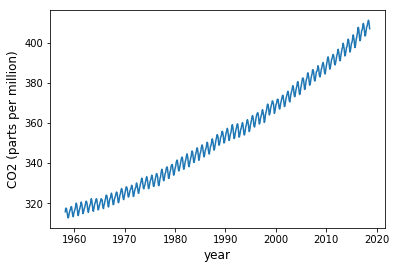

In [40]:
plt.plot( x, Y)
plt.xlabel('year',size=12)
plt.ylabel('CO2 (parts per million)',size=12);

## Linear fit 

$
\textrm{Model:} \quad\hat{y} = w_0 + w_1 x
$

$
\textrm{Training set:} \quad
\{(x^{(1)},y^{(1)})\},\dots,\{(x^{(m)},y^{(m)})\}
$

$
\textrm{Design matrix:} \quad 
X = \left[
\begin{array}
1 1 & x^{(1)}\\
1 & x^{(2)}\\
\vdots & \vdots\\
1 & x^{(m)}
\end{array}
\right]
%
\quad , \quad
Y = \left[
\begin{array}
1 y^{(1)}\\
y^{(2)}\\
\vdots \\
y^{(m)}
\end{array}
\right]
%
\quad , \quad
\theta^* = \left[
\begin{array}
1 w_0\\
w_1
\end{array}
\right]
$


$
\textrm{Normal equation:} 
\quad
\theta^* = (X^T X)^{-1}X^T Y
$

$
\textrm{Objective function:} 
\quad
J(\theta) = \frac{1}{2m} (X \theta-Y)^T  (X \theta-Y) 
$

Notice that we're using the more compact notation that requires the inclusion of a bias terms column in the design matrix $X$.

In [41]:
# design matrix
X = np.hstack((x**0 , x))

In [42]:
# Our package, 'linear_regression.py', solves the normal equation using the command

# def best_fit_parameters(X,Y):
#     return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

# and defines the objective funtion using the command

# def objective_function(X,Y,theta):
#     return (X.dot(theta)-Y).T.dot(X.dot(theta)-Y)[0][0]/2./len(Y)

In [43]:
theta = lr.best_fit_parameters(X,Y)
fit = 'y = ' + '{:03.2f}'.format(theta[0][0]) + ' + {:03.2f}'.format(theta[1][0]) + ' x'
print fit
print 'J = ' + '{:03.2f}'.format(lr.objective_function(X,Y,theta))

y = -2727.66 + 1.55 x
J = 8.46


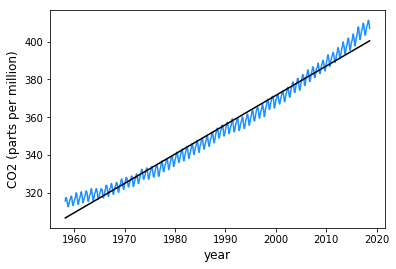

In [44]:
plt.plot(x , Y , color = 'dodgerblue')
plt.plot(x, theta[0] + theta[1]*x, '-k', label='linear fit')
plt.xlabel('year',size=12)
plt.ylabel('CO2 (parts per million)',size=12);

In [45]:
del X, theta

## Quadratic fit 

We can use the simple formalism of the linear regression to include non-linear terms. In this case, we're redifining the design matrix by explicitly including a quadratic contribution:

$
\textrm{Model:} \quad \hat{y} = w_0 + w_1 x + w_2 x^2
$



$
\textrm{Design matrix:} \quad 
X = \left[
\begin{array}
1 1 & x^{(1)} & (x^{(1)})^2 \\
1   & x^{(2)} & (x^{(2)})^2 \\
\vdots & \vdots & \vdots\\
1 & x^{(m)} & (x^{(m)})^2
\end{array}
\right]
%
\quad , \quad
%
\theta^* = \left[
\begin{array}
1 w_0\\
w_1 \\
w_2
\end{array}
\right]
$

The advantage of using a vectorized form for our normal equation is that it remains formally the same. The only change is in the dimensionality of the matrices and vectors involved.

In [46]:
X = np.hstack((x**0 , x , x**2)) # design matrix with quadratic terms

In [47]:
theta = lr.best_fit_parameters(X,Y)
fit = 'y = ' + '{:03.2f}'.format(theta[0][0]) + ' + {:03.2f}'.format(theta[1][0]) + ' x'+ ' + {:03.2f}'.format(theta[2][0]) + ' x**2'
print fit
print 'J = ' + '{:03.2f}'.format(lr.objective_function(X,Y,theta))

y = 47536.77 + -49.01 x + 0.01 x**2
J = 2.44


This is a better fit. <br />
The minimum of the objective function is lowered by the inclusion of a quadratic term.

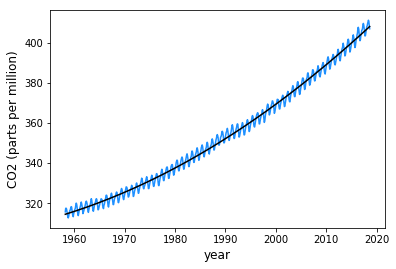

In [48]:
plt.plot(x , Y , color = 'dodgerblue')
plt.plot(x, theta[0] + theta[1]*x + theta[2]*x**2, '-k', label='linear fit')
plt.xlabel('year',size=12)
plt.ylabel('CO2 (parts per million)',size=12);

**Question:** Do you get an even better agreement if you keep increasing the order of the fitting polinomial? If not, why?

**Exercise:** Define a python function for the design matrix of orden $n$ interpolation.